<a href="https://colab.research.google.com/github/Frazanhibriz/Machine-Learning/blob/main/DeepLearning/CompVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# !pip install tensorflow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 --force-reinstall
# !pip install --upgrade pip setuptools
# !pip install --upgrade tensorflow tensorflow-text tf-keras


In [18]:
import tensorflow as tf
layers = tf.keras.layers
from tensorflow import keras
from keras.utils import image_dataset_from_directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

In [19]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# 1. Load & Preprocess Data
data_dir = "/content/drive/My Drive/Dataset/GDGoCTel-U_can-you-spot-ai-artist/train"
img_size = (224, 224)
batch_size = 32

# Get list of image paths
image_paths = glob(os.path.join(data_dir, "*.jpg"))

# Load images manually
def load_images(image_paths):
    images = []
    labels = []  # Assuming labels are binary, modify as needed
    for img_path in image_paths:
        img = keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = keras.preprocessing.image.img_to_array(img)
        img = img / 255.0  # Normalize
        images.append(img)
        labels.append(0)  # Assign labels as needed
    return np.array(images), np.array(labels)

# Load dataset
X_train, y_train = load_images(image_paths)

In [21]:
# 2. Build CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# 3. Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# 4. Train Model
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 0.9683 - loss: 0.1337 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 1.0000 - loss: 1.6211e-31 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accur

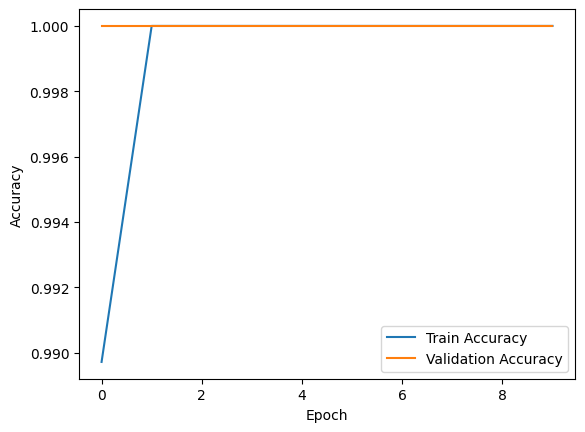

In [24]:
# 5. Evaluate Model
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Save Model
model.save("human_vs_ai_model.h5")

In [26]:
# Load trained model
model_path = "human_vs_ai_model.h5"
model = tf.keras.models.load_model(model_path)

In [27]:
# Path ke folder test
test_dir = "/content/drive/My Drive/Dataset/GDGoCTel-U_can-you-spot-ai-artist/test"
img_size = (224, 224)

In [28]:
# Ambil daftar gambar di folder test
test_images = glob(os.path.join(test_dir, "*.jpg")) + glob(os.path.join(test_dir, "*.jpeg")) + glob(os.path.join(test_dir, "*.png"))

In [29]:
# Fungsi untuk memproses dan memprediksi gambar
def predict_image(image_path):
    img = image.load_img(image_path, target_size=img_size)
    img = image.img_to_array(img)
    img = img / 255.0  # Normalisasi
    img = np.expand_dims(img, axis=0)  # Tambahkan batch dimension
    prediction = model.predict(img)
    return 1 if prediction > 0.5 else 0  # Gunakan threshold 0.5

# Lakukan prediksi untuk setiap gambar
results = []
for img_path in test_images:
    img_name = os.path.basename(img_path)  # Ambil nama file saja
    label = predict_image(img_path)
    results.append([img_name, label])


NameError: name 'image' is not defined

In [ ]:
# Simpan hasil ke dalam CSV
df = pd.DataFrame(results, columns=["image", "label"])
df.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")